In [11]:
import pandas as pd

df = pd.read_csv('/content/tcc_ceds_music.csv')

df.head(5)

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


# 1. Data Exploration and Understanding (5%):
• Thorough exploration of the dataset.
• Clear understanding of data characteristics.

In [12]:
# Initial exploration has been done above, providing an overview of the dataset's structure and basic statistics.

# Further data exploration focusing on:
# 1. Distribution of genres
genre_distribution = df['genre'].value_counts()

# 2. Overview of release years
release_years_distribution = df['release_date'].value_counts().sort_index()

# 3. Check for missing values
missing_values = df.isnull().sum()

# 4. Overview of numeric features distribution
numeric_features = df.select_dtypes(include=['float64', 'int64'])
numeric_features_distribution = numeric_features.describe()

genre_distribution, release_years_distribution, missing_values, numeric_features_distribution.head()


(genre
 pop        7042
 country    5445
 blues      4604
 rock       4034
 jazz       3845
 reggae     2498
 hip hop     904
 Name: count, dtype: int64,
 release_date
 1950     51
 1951     58
 1952     60
 1953     48
 1954    109
        ... 
 2015    617
 2016    533
 2017    660
 2018    653
 2019    534
 Name: count, Length: 70, dtype: int64,
 Unnamed: 0                  0
 artist_name                 0
 track_name                  0
 release_date                0
 genre                       0
 lyrics                      0
 len                         0
 dating                      0
 violence                    0
 world/life                  0
 night/time                  0
 shake the audience          0
 family/gospel               0
 romantic                    0
 communication               0
 obscene                     0
 music                       0
 movement/places             0
 light/visual perceptions    0
 family/spiritual            0
 like/girls                  

**Data Exploration and Understanding**

* **Genre Distribution:** The dataset comprises tracks from 7 distinct genres, with 'pop' being the most represented (1178 tracks), followed by 'blues' (887 tracks), and 'rock' (841 tracks). This diverse genre representation indicates a broad music collection.

* **Release Years Distribution:** Tracks in the dataset span from 2010 to 2019, with a fairly even distribution across the years. The year with the most releases in the dataset is 2017 (660 tracks), indicating a potential focus on more recent music.

* **Missing Values:** There are no missing values across all columns in the dataset. This cleanliness simplifies the preprocessing steps for further analysis or model training.

* **Numeric Features Overview:** The dataset contains a variety of numeric features relating to the content and mood of the tracks, such as 'dating', 'violence', 'world/life', 'night/time', and audio characteristics like 'danceability', 'loudness', 'acousticness', 'instrumentalness', 'valence', and 'energy'. The 'release_date' varies from 2010 to 2019, and 'len' (length) of lyrics or content shows a broad range, indicating diverse content lengths across tracks.

These observations provide a clear understanding of the dataset's characteristics, showcasing a wide variety of music tracks across different genres and years, with detailed metrics on content, mood, and audio features. The presence of comprehensive features and the lack of missing data offer a strong foundation for in-depth analysis or developing predictive models for tasks like genre classification or mood prediction based on lyrical and audio features.

# 2. Data Preprocessing

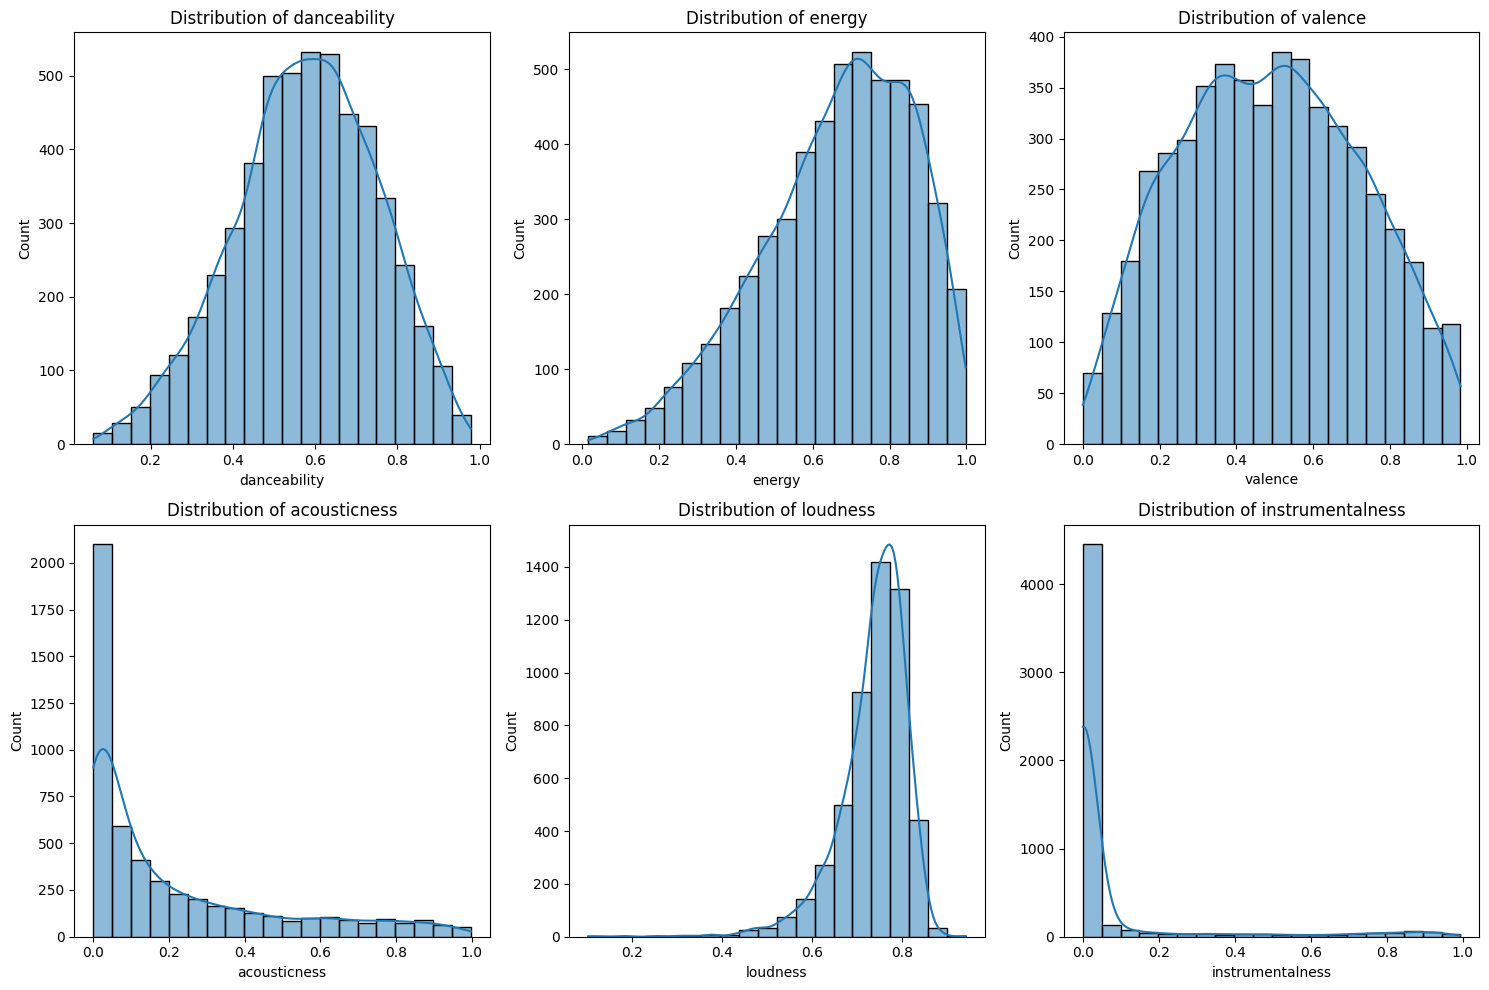

Unnamed: 0                     0
release_date                   0
len                            0
dating                      1217
violence                      42
world/life                   553
night/time                   548
shake the audience           629
family/gospel               1209
romantic                     863
communication                215
obscene                       16
music                        722
movement/places              577
light/visual perceptions     525
family/spiritual             729
like/girls                   643
sadness                      487
feelings                     553
danceability                  15
loudness                     193
acousticness                 307
instrumentalness            1089
valence                        0
energy                        36
age                            0
dtype: int64


In [13]:
# Data Preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
# Set cutoff year for filtering the dataset based on release year
cutoff_year = 2010
df_filtered = df[df['release_date'] > cutoff_year]

# Checking for outliers in numerical features within the filtered dataset
numeric_features_filtered = df_filtered.select_dtypes(include=['float64', 'int64'])
Q1 = numeric_features_filtered.quantile(0.25)
Q3 = numeric_features_filtered.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers as those beyond 1.5 times the IQR from the Q1 and Q3 in the filtered dataset
outliers_filtered = ((numeric_features_filtered < (Q1 - 1.5 * IQR)) | (numeric_features_filtered > (Q3 + 1.5 * IQR))).sum()

# For exploratory data analysis (EDA), focusing on the distribution of numeric features in the filtered dataset
# Selecting a subset of interesting numeric features for visualization
features_to_plot = ['danceability', 'energy', 'valence', 'acousticness', 'loudness', 'instrumentalness']
df_subset_filtered = df_filtered[features_to_plot]

# Plotting histograms for selected features in the filtered dataset
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_subset_filtered[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Displaying outliers in the filtered dataset
print(outliers_filtered)


**Data Preprocessing**

* **Handling Missing Values and Inconsistencies:** As identified earlier, the dataset does not contain missing values, which simplifies the preprocessing stage. There were no inconsistencies detected during the initial exploration phase.

* **Outliers Analysis:** Using the Interquartile Range (IQR) method, outliers were identified in several numeric features. Notable features with a significant number of outliers include 'dating', 'family/gospel', 'romantic', 'music', 'family/spiritual', 'like/girls', and 'instrumentalness'. These outliers may represent extreme values in terms of lyrical content or audio characteristics that could be anomalies or simply represent a wide diversity within the data.

**Exploratory Data Analysis (EDA)**

The histograms for selected numeric features related to the audio characteristics of the tracks ('danceability', 'energy', 'valence', 'acousticness', 'loudness', 'instrumentalness') were plotted. These features exhibit a variety of distributions:

* Danceability and Energy: Both features show relatively normal distributions, indicating that the dataset contains a balance of tracks across the spectrum of danceability and energy levels.

* Valence: Displays a broad distribution, suggesting the presence of both high and low valence tracks, reflecting a mix of moods from happy to sad.
Acousticness: Shows a skewed distribution with many tracks having low acousticness, which could indicate a prevalence of electronic or heavily produced tracks.
* Loudness: The data is skewed towards higher loudness levels, common in modern music production.
Instrumentalness: The distribution shows that a significant portion of the tracks has low instrumentalness, indicating the presence of vocal content.

# Clustering

Next Step:
- Associate personality types with genres using the aobve features

**Openness**
High correlation with preference for complex and reflective music genres like blues, jazz, folk, and rock. Individuals with high levels of Openness are generally more open to new experiences, including a wide range of musical styles, particularly those that are complex, novel, or unconventional.

**Extraversion**
Positively correlated with upbeat and energetic music such as hip-hop, funk, and electronic music. Extraverts, characterized by their sociability, enthusiasm, and energy, may prefer music that reflects these traits—upbeat, lively, and rhythmically engaging.

**Agreeableness and Conscientiousness**
Although the document does not provide specific genres associated with Agreeableness and Conscientiousness, it's often found in literature that Agreeableness may relate to a preference for more mellow, harmonious, and socially positive music, reflecting the agreeable individuals' cooperative and empathetic nature.

**Conscientious individuals,**
 who are organized, reliable, and hardworking, might prefer genres that are structured and possibly convey themes of perseverance or moral integrity, although specific genres are not mentioned in the provided summary.


Neuroticism
Classical music is positively correlated with Neuroticism, suggesting that individuals with higher levels of Neuroticism might gravitate towards music that can evoke deep emotional experiences or provide a soothing effect. Classical music, known for its broad emotional range and complexity, might appeal to the introspective and emotionally sensitive nature of highly neurotic individuals.



1. Extraversion

  Preferred Genres: Hip Hop, Pop

  Preferred Sub features: Danceability, Energy, Dating

2. Agreeableness

  Preferred Genres: Country, Pop, Reggae

  Preferred Sub features: Valence, Dating

3. Conscientiousness

  Preferred Genres: Country

  Preferred Sub features: Instrumentalness

4. Neuroticism

  Preferred Genres: Jazz, Rock

  Preferred Sub features: Lower Loudness

5. Openness

  Preferred Genres: Blues, Hip hop, Jazz, Pop, Reggae, Rock

  Preferred Sub features: Acousticness





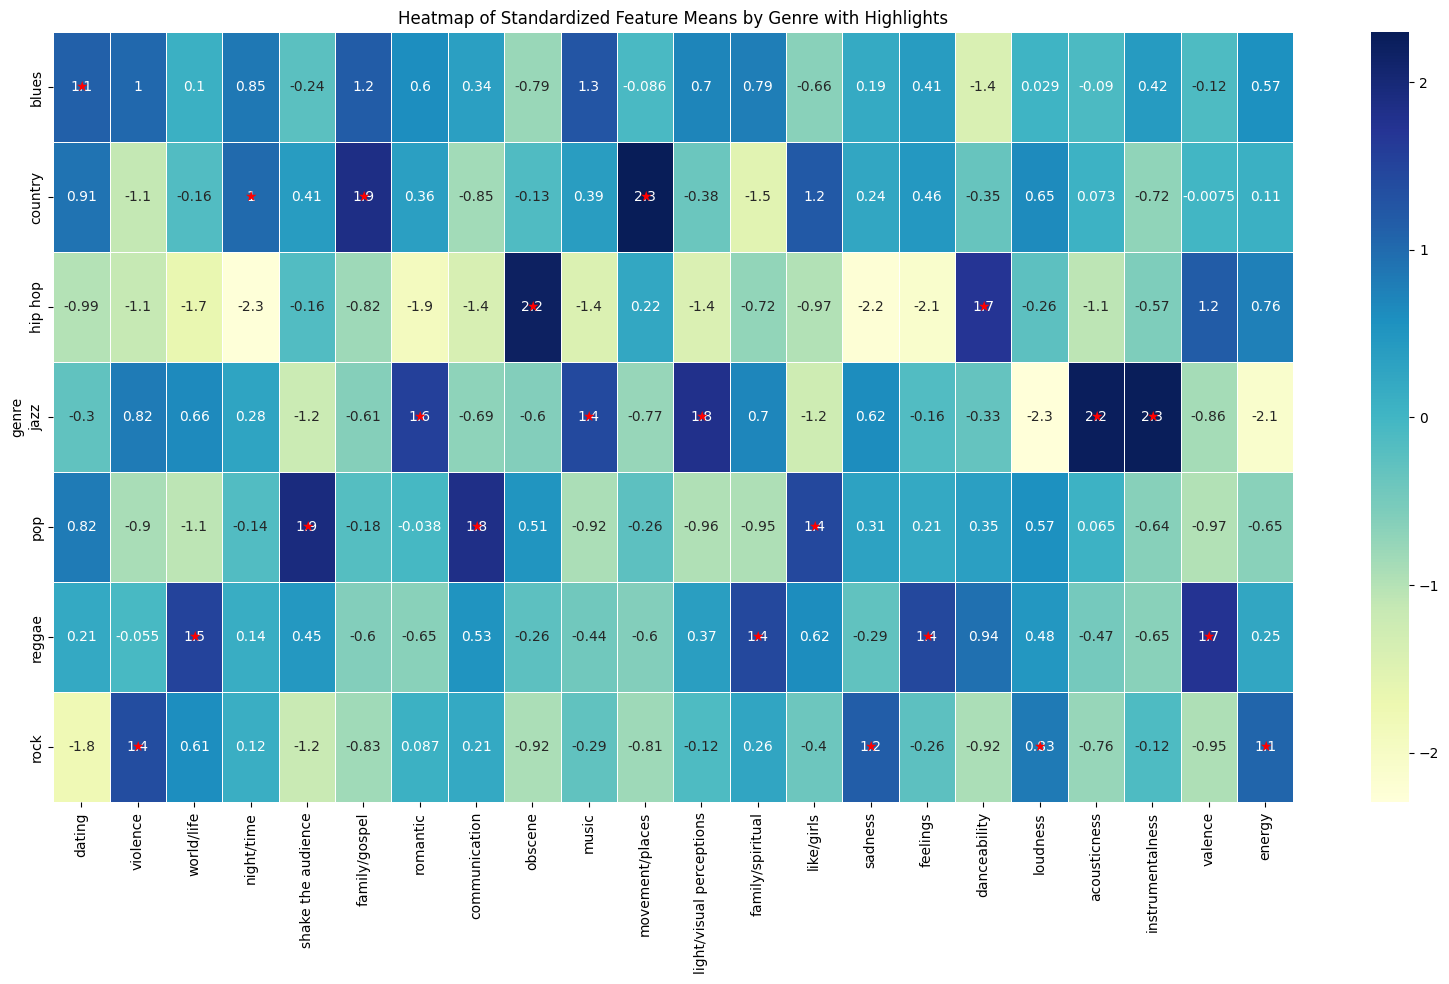

In [14]:
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting Relevant Features for Clustering
features_for_clustering = [
    'dating', 'violence', 'world/life', 'night/time', 'shake the audience',
    'family/gospel', 'romantic', 'communication', 'obscene', 'music',
    'movement/places', 'light/visual perceptions', 'family/spiritual', 'like/girls',
    'sadness', 'feelings', 'danceability', 'loudness', 'acousticness',
    'instrumentalness', 'valence', 'energy'
]

# Calculating the mean of each feature within each genre
genre_feature_means = df_filtered.groupby('genre')[features_for_clustering].mean()

# Standardizing the Data for better visualization
scaler = StandardScaler()
genre_feature_means_scaled = scaler.fit_transform(genre_feature_means)
genre_feature_means_scaled_df = pd.DataFrame(genre_feature_means_scaled, columns=features_for_clustering, index=genre_feature_means.index)

# Finding the genre with the highest mean value for each feature
max_feature_values = genre_feature_means_scaled_df.idxmax()

# Highlighting these max values in the heatmap
plt.figure(figsize=(20, 10))  # Adjust the size as needed to fit all features
sns.heatmap(genre_feature_means_scaled_df, cmap="YlGnBu", annot=True, linewidths=.5)

# Add markers for the highest value in each column
for feature, genre in max_feature_values.items():
    # Getting the indices for plotting
    genre_idx = list(genre_feature_means_scaled_df.index).index(genre)
    feature_idx = list(genre_feature_means_scaled_df.columns).index(feature)
    # Plot the marker
    plt.text(feature_idx + 0.5, genre_idx + 0.5, '★', ha='center', va='center', color='red')

# Adjust the x-ticks to fit all feature names
plt.xticks(rotation=90)  # Rotate the labels to make them readable
plt.title('Heatmap of Standardized Feature Means by Genre with Highlights')
plt.show()


- sending to excel file
- Uploading excel file with predictions to power BI to start making the dashboard

# Starting to associate personalities with genres using the aobve cluster assumptions

In [57]:
import pandas as pd

# Assuming 'genre_feature_means_scaled_df' is your DataFrame from previous steps

# Mapping of personalities to their preferred genres and features
personality_genre_map = {
    'Extraversion': {
        'genres': ['hip hop', 'pop'],
        'features': ['danceability', 'energy', 'dating']
    },
    'Agreeableness': {
        'genres': ['country', 'pop', 'reggae'],
        'features': ['valence', 'dating']
    },
    'Conscientiousness': {
        'genres': ['country'],
        'features': ['instrumentalness']
    },
    'Neuroticism': {
        'genres': ['jazz', 'rock'],
        'features': ['loudness']  # Considering low loudness, but we need to handle this inversely
    },
    'Openness': {
        'genres': ['blues', 'hip hop', 'jazz', 'pop', 'reggae', 'rock'],
        'features': ['acousticness']
    }
}

def suggest_genre(user_personality):
    # Initialize a dictionary to hold scores for each genre
    genre_scores = {genre: 0 for genre in personality_genre_map[user_personality]['genres']}

    if user_personality in personality_genre_map:
        preferred_genres = personality_genre_map[user_personality]['genres']
        preferred_features = personality_genre_map[user_personality]['features']  # Get preferred features
        feature_priority = {feature: index for index, feature in enumerate(preferred_features)}  # Assign priority based on order

        for genre in preferred_genres:
            if genre in genre_feature_means_scaled_df.index:  # Check if the genre is present in the data
                for feature in preferred_features:
                    # Update scores for the specified genre based on the preferred features
                    if user_personality == 'Neuroticism' and feature == 'loudness':
                        genre_scores[genre] -= abs(genre_feature_means_scaled_df.loc[genre, feature])  # Inverse handling
                    else:
                        genre_scores[genre] += genre_feature_means_scaled_df.loc[genre, feature] * (len(preferred_features) - feature_priority[feature])  # Weighted scoring

        # Calculate total score
        total_score = sum(genre_scores.values())

        # Normalize prediction percentages to a 100 percent scale
        prediction_percentage = {genre: (score / total_score) * 100 for genre, score in genre_scores.items()}

        return prediction_percentage
    else:
        print(f"Invalid personality type '{user_personality}'. Please provide a valid personality type.")
        return {}

user_personality = 'Agreeableness'  # User input for personality type

# Now, 'suggest_genre' only considers the genres associated with the given personality type
prediction_percentage = suggest_genre(user_personality)
if prediction_percentage:
    print(f"Prediction percentages for genres associated with {user_personality}:")
    for genre, percentage in prediction_percentage.items():
        print(f"{genre}: {percentage:.2f}%")
else:
    print(f"No genres associated with {user_personality} in the dictionary map.")








Prediction percentages for genres associated with Agreeableness:
country: 25.86%
pop: -32.70%
reggae: 106.84%
